In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [25]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

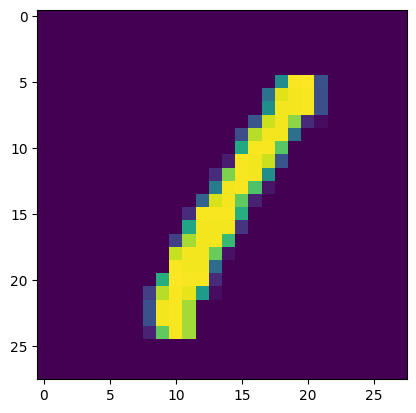

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [29]:
X_train=X_train/255
X_test=X_test/255

In [36]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [44]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0529 - val_loss: 0.0963
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0401 - val_loss: 0.1077
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0328 - val_loss: 0.1089
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0271 - val_loss: 0.1115
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0247 - val_loss: 0.1415
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0207 - val_loss: 0.1159
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0179 - val_loss: 0.1148
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0173 - val_loss: 0.1229
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0125 - val_loss: 0.1160
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0100 - val_loss: 0.1374
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0167 - val_loss: 0.1338
Epoch 12/25
1500/1500 ━━━━━━━

In [45]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [46]:
y_pred=y_prob.argmax(axis=1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9721

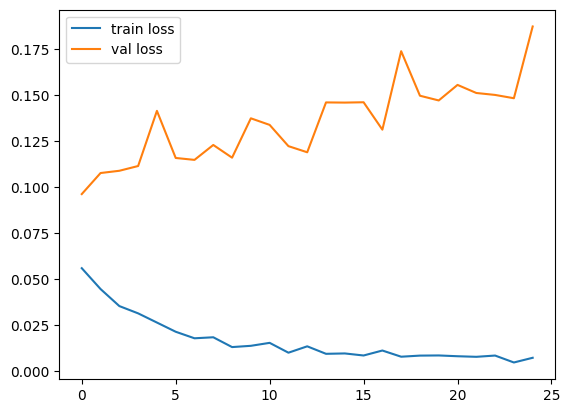

In [49]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

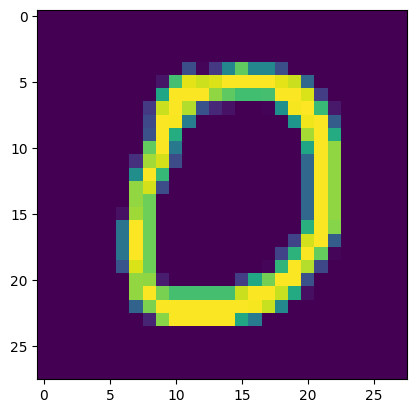

In [52]:
plt.imshow(X_test[10])

In [53]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0])